In [1]:
from matplotlib import pyplot as plt
import numpy as np


In [3]:
%run ~/github/Virgo/programs/readtablesv2.py

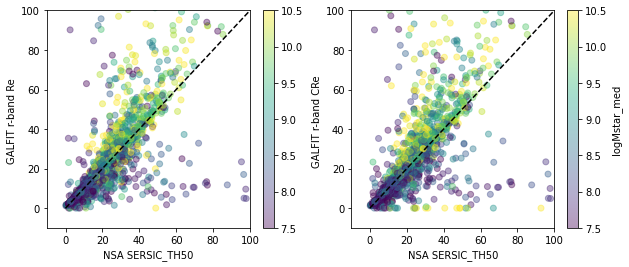

In [38]:
# galfit r-band vs NSA

leg_pixscale = 0.262
y = v.galfit_r['RE']*leg_pixscale
x = v.nsav0['SERSIC_TH50']

xmin=-10
xmax=100

flag = (v.nsav0['SERSIC_TH50'] > 0) & (v.galfit_r['MAG'] > 0)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x[flag],y[flag],alpha=0.4,c=v.magphys['logMstar_med'][flag],vmin=7.5,vmax=10.5)#c=v.ephot['GROUP_MULT'],
plt.colorbar()
plt.axis([xmin,xmax,xmin,xmax])
plt.xlabel('NSA SERSIC_TH50')
plt.ylabel('GALFIT r-band Re ')
xline = np.linspace(0,200)
plt.plot(xline,xline,'k--')

y = v.galfit_r['CRE']*leg_pixscale
x = v.nsav0['SERSIC_TH50']

plt.subplot(1,2,2)
plt.scatter(x[flag],y[flag],alpha=0.4,c=v.magphys['logMstar_med'][flag],vmin=7.5,vmax=10.5)#c=v.ephot['GROUP_MULT'],
plt.colorbar(label='logMstar_med')

plt.axis([xmin,xmax,xmin,xmax])
plt.xlabel('NSA SERSIC_TH50')
plt.ylabel('GALFIT r-band CRe ')

xline = np.linspace(0,200)
plt.plot(xline,xline,'k--')

In [18]:
v.magphys.colnames

['VFID',
 'logMstar_med',
 'logSFR_med',
 'logsSFR_med',
 'fmu_SFR_med',
 'fmu_IR_med',
 'mu_med',
 'tau_V_med',
 'Ldust_tot_med',
 'Tc_ISM_med',
 'Tw_BC_med',
 'xi_C_tot_med',
 'xi_PAH_tot_med',
 'xi_MIR_tot_med',
 'xi_W_tot_med',
 'tau_V_ISM_med',
 'Mdust_med',
 'logMstar_percent',
 'logSFR_percent',
 'logsSFR_percent',
 'fmu_SFR_percent',
 'fmu_IR_percent',
 'mu_percent',
 'tau_V_percent',
 'Ldust_tot_percent',
 'Tc_ISM_percent',
 'Tw_BC_percent',
 'xi_C_tot_percent',
 'xi_PAH_tot_percent',
 'xi_MIR_tot_percent',
 'xi_W_tot_percent',
 'tau_V_ISM_percent',
 'Mdust_percent',
 'logMstar_best',
 'logSFR_best',
 'logsSFR_best',
 'fmu_SFR_best',
 'fmu_IR_best',
 'mu_best',
 'tau_V_best',
 'Ldust_tot_best',
 'Tc_ISM_best',
 'Tw_BC_best',
 'xi_C_tot_best',
 'xi_PAH_tot_best',
 'xi_MIR_tot_best',
 'xi_W_tot_best',
 'tau_V_ISM_best',
 'Mdust_best',
 'chisq_best',
 'magphysFlag']